# Introduction: An Age Guessing Game

[Colab Notebook](https://colab.research.google.com/github/febse/stat2024/blob/main/01-Introduction.ipynb)

In the following game we will try to guess the age of the person in the image. The images are taken from the [UTKFace dataset](https://susanqq.github.io/UTKFace/), a large-scale face dataset. The age of the persons in our game ranges from 15 to 90 years.

Scan the following QR code to open the game in your mobile device or click here:

[https://uni-sofia.vercel.app/surveys/UKTfaces](https://uni-sofia.vercel.app/surveys/UKTfaces).

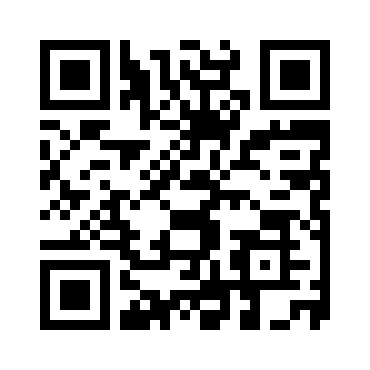

In [54]:
#| echo: false

from utils.qr_code import create_qr_code

create_qr_code('https://uni-sofia.vercel.app/surveys/UKTfaces')

## Data Import

Now that we have played the game, let's import the data and see what we can learn from it. The following block of code will download the data, restructure it and display the first few rows. In these introductory classes you do not need to understand the code, but you can run it and see the results.

The data consists of the following columns:

- **FileId** (character): The name of the image file.
- **UserId** (character): A unique identifier for the user.
- **Guess** (numeric): The age guessed by the user.
- **Age** (numeric): The actual age of the person in the image.
- **Gender** (character): The gender of the person in the image.
- **Position** (numeric): The position of the image in the game (0-16), 0 being the first image shown to the user, 1 the second, and so on. The images were shown in random order except for the first image which was always the same.
- **TimeStart** (numeric): The time when the user saw the image (milliseconds from 1970-01-01).
- **TimeEnd** (numeric): The time when the user submitted the guess (milliseconds from 1970-01-01).

```python

Each row corresponds to a guess made by a user for a specific image.

In [55]:
#| echo: false

import pandas as pd
import numpy as np

# NOTE: you can ignore this code, it's just for data preparation

# Imports the age guessing data from the database,
# restructures it and merges it with the game data.

dt_raw = pd.read_json("https://get-uktfaces-data-suq3dizvtq-uc.a.run.app")
dt = pd.melt(
    dt_raw.reset_index(names="FileId"), 
    id_vars=["FileId"],
    var_name="UserId",
    value_name="Data"
)
dt_mesurements = pd.json_normalize(dt['Data']).rename(columns=lambda x: x[0].upper() + x[1:])
dt = pd.concat([dt.drop(columns=["Data"]), dt_mesurements], axis=1)

game = pd.read_json("https://get-uktfaces-game-suq3dizvtq-uc.a.run.app").rename(columns={"id": "FileId", "age": "Age", "race_f": "Race", "gender": "Gender"})
dt = dt.merge(game, on="FileId", how="left")[["FileId", "UserId", "Guess", "Age", "Race", "Gender", "Position", "TimeStart", "TimeEnd"]].copy()
dt.head()

,FileId,UserId,Guess,Age,Race,Gender,Position,TimeStart,TimeEnd
0,72_1_0_20170110141531648_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,58,72,White,F,10,1728456243117,1728456250343
1,62_0_0_20170111210223707_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,70,62,White,M,9,1728456238837,1728456243116
2,75_0_1_20170111205346848_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,57,75,Other,M,7,1728456228654,1728456235495
3,21_1_2_20170105183505385_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,19,21,Other,F,16,1728456288579,1728456295650
4,28_0_1_20170112211810813_jpg,2TkJQyslSFb5GXbdv1aCc2QAZO53,30,28,Other,M,11,1728456250345,1728456254708


In [1]:
x = 2 ** 35

y = 8.12

print(x / y)
x * y

34,359,738,368
4231494872.9064045


279001075548.16

## Data Description

The first thing we want to know about a new dataset is its size. How many rows and columns does it have? We can use the `shape` attribute of the DataFrame to find out.

In [57]:
# Data shape is a tuple (think of it as a list of numbers for now): the first number is the number of rows, the second number is the number of columns
dt.shape

(714, 9)

In [58]:
# You can access the individual elements of the tuple using square brackets

# The first number is the number of rows
dt.shape[0]
print("There are", dt.shape[0], "rows in the dataset.")

# The second number is the number of columns
dt.shape[1]
print("There are", dt.shape[1], "columns in the dataset.")

There are 714 rows in the dataset.
There are 9 columns in the dataset.


In [59]:
# dt.shape[2]

In [60]:
dt.shape

(714, 9)

In [61]:
# What are the columns in the dataset?

# The columns are stored in the columns attribute of the DataFrame
dt.columns


Index(['FileId', 'UserId', 'Guess', 'Age', 'Race', 'Gender', 'Position',
       'TimeStart', 'TimeEnd'],
      dtype='object')

In [1]:
# How many unique users are there in the dataset? You can access the columns in the using the brackets notation

# The unique function returns the unique values in a Series

dt["UserId"].unique()

NameError: name 'dt' is not defined

In [63]:
dt["UserId"].nunique()

42

In [64]:
# Sometimes it is useful to sort the unique values

np.sort(dt["UserId"].unique())

array(['2TkJQyslSFb5GXbdv1aCc2QAZO53', '4W0FEKDKyjNZUuCf9uBNs8rfjjq1',
       '8Dv06RmVjaVJE4ZFNRMK5f1oQOp1', '8fPccGO10Bb2la4FkBqgl1rVWHg1',
       '8jKBM5SOv0fOly6vCBdHXtxBPQ23', '9j9Y0NUvW0MJRsoa266Y1kMZSuY2',
       'CPjrqG93VHSL9IGx30p4ZSXd4Qr1', 'CbS6ZrS8dyd0awFJRvhc7OBK5YA2',
       'DuGjUzQlaUOS2bOkD2nzCq3TaMI3', 'GmKPuKAbgoYQCPmlg8RwPNsBHM23',
       'HqIR4yBnDLax4jjFITVp6hVvqx52', 'Lec4YA560vapZcD5fIP8MJm5sl42',
       'MxAZfVjX3eZRJXHxkdj8TrkCldD2', 'NPtpMro4nOOJTqTNpt8PPHmbiFk2',
       'OBczO7vxLvN2FiLBkqnQvCM8NdF2', 'PVb3jSAxyMXAuQ2PeIpdqQ0ILp53',
       'PphGn6oTxNPO1u8YiwrruLNTzXE2', 'QEskanUwcUNT2gyBQFvSaVHeI4D3',
       'SQC3UTi7a1P7CGyqhy7mBe8Zgmj2', 'Tvwjrx7GfaaBRYS6TGadjBjO9HF2',
       'TzOCmmyl29OjE7JyQjqJqg7lD3u1', 'UCEzPzCCb7YfusqZVuUmGPIMFVV2',
       'UpgLIyOuiVSd3y8VQ2gnJ6ViCxw2', 'VeyVpTOLy7NR0V5ZCnbLipceCEG2',
       'W8MAPl0tmKbJAJ3abhcnQrqG5no1', 'WLi6ASLPTccgRUo1KG6ThcH80Nx1',
       'Y1fElir0oXeayPWZb5vLKph5lUo2', 'b0lWZmr0VDa5EFS4AJliWXDqFKP2',
      

In [65]:
# The nunique function returns the number of unique values in a Series

dt["UserId"].nunique()

42

:::{#ex-1}
## Exercise

List the unique values of the `FileId` column. How many unique images are there in the dataset?

:::

In [66]:
# Write your code here and 


## Selecting Subsets of the Data

There are multiple ways to choose a part of the data. We can select rows by their index, columns by their name, or both. We can also use logical conditions to filter the data.
Here we want to select only the rows belonging to one of the users.

In [67]:
# The == operator checks if two values are equal. It returns a boolean value (True or False).

(dt["UserId"] == "2TkJQyslSFb5GXbdv1aCc2QAZO53").sum()

17

In [68]:
# Putting this boolean series in square brackets returns only the rows where the condition is True

mydt = dt[dt["UserId"] == "8jKBM5SOv0fOly6vCBdHXtxBPQ23"].copy()
mydt

,FileId,UserId,Guess,Age,Race,Gender,Position,TimeStart,TimeEnd
68,72_1_0_20170110141531648_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,69,72,White,F,7,1728466078201,1728466083168
69,62_0_0_20170111210223707_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,72,62,White,M,4,1728466058849,1728466065965
70,75_0_1_20170111205346848_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,69,75,Other,M,14,1728466118959,1728466125058
71,21_1_2_20170105183505385_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,32,21,Other,F,9,1728466093455,1728466098292
72,28_0_1_20170112211810813_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,36,28,Other,M,12,1728466106791,1728466112456
73,30_0_4_20170117202914440_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,43,30,Other,M,0,1728465970667,1728466037743
74,62_1_0_20170110175644800_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,68,62,White,F,5,1728466065967,1728466075283
75,16_0_0_20170110231841292_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,17,16,White,M,16,1728466134829,1728466141246
76,18_1_0_20170109214608184_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,22,18,White,F,6,1728466075284,1728466078199
77,75_0_3_20170111202756116_jpg,8jKBM5SOv0fOly6vCBdHXtxBPQ23,57,75,Other,M,1,1728466037744,1728466045288


:::{#ex-mydata}
## Select Your Data

Create a new DataFrame called `mydt` containing only the rows where the `UserId` is equal to your unique identifier (it is shown on the results page of the game).
To avoid typing the whole identifier, look at the sorted unique values of the `UserId` and copy the one that corresponds to you.

:::

## Counting Things

A lot of the time we will want to compute some simple counts. In our example, we may want to count the number of guesses made by each user, the number of guesses that overestimated the age, or the number of correct guesses. We can accomplish this using logical conditions and the `sum` method of series (or the `np.sum` function).

:::{#ex-counting-overestimations}

## Counting Overestimations

How many times did you overestimate the age of the person in the images?

:::

In [69]:
mydt["Overestimates"] = (mydt["Guess"] > mydt["Age"])
mydt["Underestimates"] = (mydt["Guess"] > mydt["Age"])
mydt["NoError"] = (mydt["Guess"] == mydt["Age"])
mydt["NoError"].sum()

2

In [70]:
# Exercise: In how many images did you under estimate the age?
# Write your code here


In [71]:
# Why does using the .sum() method actually work here?

x_logical = np.array([True, False, True, True, False])
x_logical

array([ True, False,  True,  True, False])

In [72]:
# Test it by changing the values (True/False) in the assignment of x_logical and running the cell again (you also need to run the cell with the definition of x_logical)
x_logical.sum()

3

In [73]:
# Exercise: How many female images have your guessed?



In [74]:
# Exercise: How many male images have you guessed?



In [75]:
# Compare your results with the output of the following code

mydt["Gender"].value_counts()

Gender
M    9
F    8
Name: count, dtype: int64